In [1]:
from osgeo import gdal
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt
import os

In [9]:
images_dir='Neural Networks/dset-s2/dset-s2/tra_scene/'
masks_dir='Neural Networks/dset-s2/dset-s2/tra_truth/'

In [14]:
# Open the multi-band image
dataset = gdal.Open(images_dir+'S2A_L2A_20190125_N0211_R034_6Bands_S1.tif')

# Get the number of bands in the image
num_bands = dataset.RasterCount
print('Number of bands: ', num_bands)

# Extract the bands you want as separate 2D arrays
band1 = dataset.GetRasterBand(1).ReadAsArray() #red
band2 = dataset.GetRasterBand(2).ReadAsArray() #green
band3 = dataset.GetRasterBand(3).ReadAsArray() #blue

# You can also extract all bands at once using the ReadAsArray() method
all_bands = dataset.ReadAsArray()

# Extract only the first 3 bands from the all_bands array
bands_1_to_3 = all_bands[:3,:,:]

Number of bands:  6


In [15]:
bands_1_to_3

array([[[ 270,  404,  376, ...,  720,  558,  525],
        [ 334,  302,  346, ...,  641,  549,  516],
        [ 446,  351,  347, ...,  562,  486,  570],
        ...,
        [ 880,  847,  816, ...,  445,  445,  469],
        [ 779,  537,  571, ...,  481,  503,  469],
        [ 778,  536,  537, ...,  544,  569,  598]],

       [[ 541,  622,  636, ..., 1098,  980,  905],
        [ 555,  535,  602, ..., 1032,  998,  969],
        [ 730,  618,  610, ...,  968,  962, 1023],
        ...,
        [1442, 1394, 1300, ...,  681,  655,  653],
        [1278,  883,  940, ...,  750,  674,  702],
        [1314,  841,  843, ...,  786,  786,  877]],

       [[ 707,  771,  782, ..., 1408, 1164, 1112],
        [ 687,  651,  721, ..., 1282, 1174, 1120],
        [ 957,  813,  758, ..., 1166, 1120, 1130],
        ...,
        [1946, 1892, 1688, ...,  965,  965,  963],
        [1704, 1198, 1230, ..., 1034, 1028, 1021],
        [1660, 1072, 1074, ..., 1086, 1102, 1144]]], dtype=uint16)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


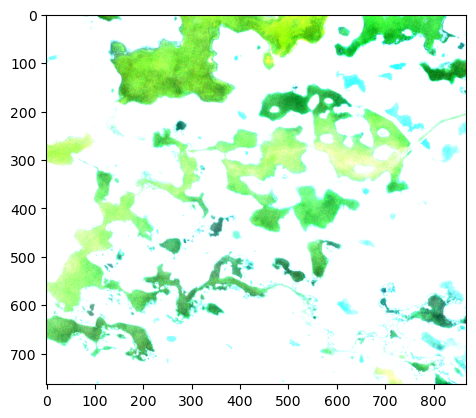

<AxesSubplot:>

In [16]:
show(bands_1_to_3)

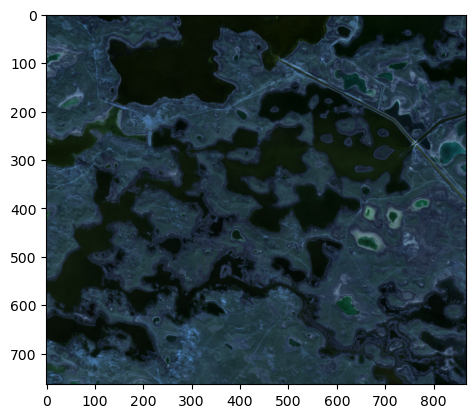

<AxesSubplot:>

In [26]:
from matplotlib.colors import Normalize
import numpy as np

norm = Normalize(vmin=bands_1_to_3.min(), vmax=bands_1_to_3.max(), clip=True)
data_norm = norm(bands_1_to_3).astype(np.float32)

show(data_norm)

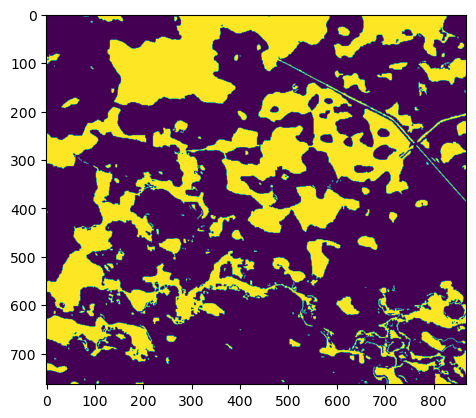

<AxesSubplot:>

In [37]:
from skimage.io import imread, imshow
mask = imread(masks_dir+'S2A_L2A_20190125_N0211_R034_S1_Truth.tif')
show(mask)

## Extracting RGB band images for all the images in the directory

In [65]:
def get_rgb(image):
    all_bands = image.ReadAsArray()
    bands_1_to_3 = all_bands[:3,:,:]
    normalize = Normalize(vmin=bands_1_to_3.min(), vmax=bands_1_to_3.max(), clip=True)
    image_normalized = normal(bands_1_to_3).astype(np.float32)
    return image_normalized

In [61]:
image_names=[]

for root, dirs, files in os.walk((os.path.normpath(images_dir)), topdown=False):
        for name in files:
            if name.endswith('.tif'):
                image_names.append(name)

In [63]:
all_images=[]

for each_image_name in image_names:
    dataset = gdal.Open(images_dir+each_image_name)
    all_images.append(dataset)    

In [66]:
all_images_in_rgb=[]

for each_image in all_images:
    each_image_in_rgb=get_rgb(each_image)
    all_images_in_rgb.append(each_image_in_rgb)